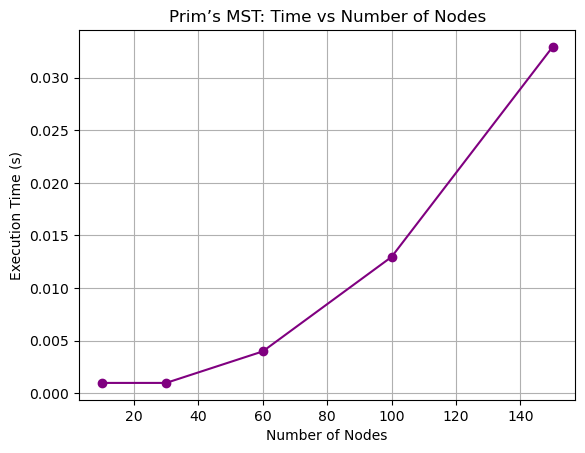

In [1]:
import heapq, random, time
import matplotlib.pyplot as plt

def prim_mst(graph, start):
    visited = set()
    pq = [(0, start)]
    total_cost = 0
    while pq:
        w, u = heapq.heappop(pq)
        if u in visited:
            continue
        visited.add(u)
        total_cost += w
        for v, cost in graph[u]:
            if v not in visited:
                heapq.heappush(pq, (cost, v))
    return total_cost

sizes = [10, 30, 60, 100, 150]
times = []

for n in sizes:
    graph = {f'N{i}': [] for i in range(n)}
    for i in range(n):
        for j in range(i+1, n):
            weight = random.randint(1, 15)
            graph[f'N{i}'].append((f'N{j}', weight))
            graph[f'N{j}'].append((f'N{i}', weight))
    start = time.time()
    prim_mst(graph, 'N0')
    end = time.time()
    times.append(end - start)

plt.plot(sizes, times, marker='o', color='purple')
plt.title("Prim’s MST: Time vs Number of Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (s)")
plt.grid(True)
plt.show()
